*Note that in this course, lecture notes are not sufficient, you must read the book for better understanding. Lecture notes are just implementing the concepts of the book on a dataset, but not explaining the concepts elaborately.*

Consider the model with interactions and transformation developed previously.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trainf = pd.read_csv('./Datasets/Car_features_train.csv')
trainp = pd.read_csv('./Datasets/Car_prices_train.csv')
testf = pd.read_csv('./Datasets/Car_features_test.csv')
testp = pd.read_csv('./Datasets/Car_prices_test.csv')
train = pd.merge(trainf,trainp)
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,18473,bmw,6 Series,2020,Semi-Auto,11,Diesel,145,53.3282,3.0,37980
1,15064,bmw,6 Series,2019,Semi-Auto,10813,Diesel,145,53.0430,3.0,33980
2,18268,bmw,6 Series,2020,Semi-Auto,6,Diesel,145,53.4379,3.0,36850
3,18480,bmw,6 Series,2017,Semi-Auto,18895,Diesel,145,51.5140,3.0,25998
4,18492,bmw,6 Series,2015,Automatic,62953,Diesel,160,51.4903,3.0,18990


In [4]:
ols_object = smf.ols(formula = 'price~(year+engineSize+mileage+mpg)**2+I(mileage**2)', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1229.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:56:00   Log-Likelihood:                -51911.
No. Observations:                4960   AIC:                         1.038e+05
Df Residuals:                    4948   BIC:                         1.039e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.282e+06   7.14e+05     -1.795      0.073   -2.68e+06    1.18e+05
year                 632.3954    353.865      1.787      0.074     -61.338    1326.128
engineSize         -1.465e+06   1.61e+05     -9.129      0.000   -1.78e+06   -1.15e+06
mileage               56.4581      3.811     14.815      0.000      48.987      63.929
mpg                -2.951e+04   9550.775     -3.089      0.002   -4.82e+04   -1.08e+04
year:engineSize      735.8074     79.532      9.252      0.000     579.890     891.725
year:mileage          -0.0281      0.002    -14.898      0.000      -0.032      -0.024
year:mpg              14.6915      4.731      3.105      0.002       5.417      23.966
engineSize:mileage    -0.0808      0.011     -7.143      0.000      -0.103      -0.059
engineSize:mpg      -120.5780     11.384    -10.592      0.000    -142.896     -98.260
mileage:mpg            0.0026      0.000      5.173      0.000       0.002       0.004
I(mileage ** 2)     3.495e-07   1.56e-07      2.236      0.025    4.31e-08    6.56e-07
==============================================================================
Omnibus:                     1958.631   Durbin-Watson:                   0.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44560.042
Skew:                           1.349   Prob(JB):                         0.00
Kurtosis:                      17.434   Cond. No.                     1.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
np.sqrt(model.mse_resid)

8502.851955843495

In [6]:
#Computing RMSE on test data
pred_price = model.predict(testf)
np.sqrt(((testp.price - pred_price)**2).mean())

8708.676318160937

Let us check if this model satisfies the assumptions of the linear regression model

## Non-linearity of data

We have assumed that there is a linear relationship between the predictors and the response. Residual plots, which are scatter plots of residuals vs fitted values, can be used to identify non-linearity. Fitted values are the values estimated by the model on training data, denoted by $\hat y_i$, and residuals are given by $e_i = y_i - \hat y_i$.

Text(0, 0.5, 'Residuals')

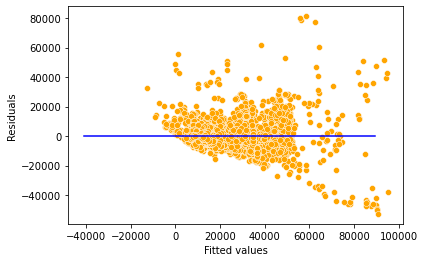

In [119]:
#Plotting residuals vs fitted values
sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_price.min(),pred_price.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

The model seems to satisfy this assumption, as we do not observe a strong pattern in the residuals. Residuals lie more or less equally on both sides of the blue line for all fitted values.

**What to do if there is non-linear association** (page 94 of book): If the residual plot indicates that there are non-linear associations in the data, then a simple approach is to use non-linear transformations of the predictors, such as $log X, \sqrt X$, and $X^2$, in the regression model.

## Non-constant variance of error terms

The variance of the error terms is assumed to be constant, i.e., $Var(\epsilon_i) = \sigma^2$, and this assumption is used while deriving the standard errors of the regression coefficients. The standard errors in turn are used to test the significant of the predictors, and obtain their confidence interval. Thus, violation of this assumption may lead to incorrect inference. Non-constant variance of error terms, or violation of the constant variance assumption, is called *heteroscedasticity.*

This assumption can be checked by plotting the residuals against fitted values.

Text(0, 0.5, 'Residuals')

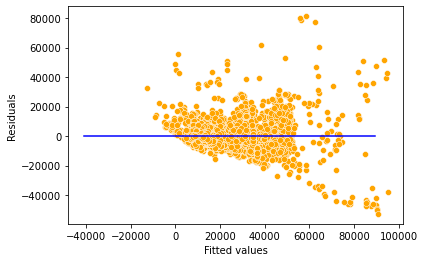

In [124]:
#Plotting residuals vs fitted values
sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_price.min(),pred_price.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

We see that the variance of errors seems to increase with increase in the fitted values. In such a case a log transformation of the response can resolve the issue to some extent. This is because a log transform will result in a higher shrinkage of larger values.

In [3]:
#Model with an interaction term and a variable transformation term
ols_object = smf.ols(formula = 'np.log(price)~(year+engineSize+mileage+mpg)**2+I(mileage**2)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1834.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:19:41   Log-Likelihood:                -1173.8
No. Observations:                4960   AIC:                             2372.
Df Residuals:                    4948   BIC:                             2450.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -238.2125     25.790     -9.237      0.000    -288.773    -187.652
year                   0.1227      0.013      9.608      0.000       0.098       0.148
engineSize            13.8349      5.795      2.387      0.017       2.475      25.195
mileage                0.0005      0.000      3.837      0.000       0.000       0.001
mpg                   -1.2446      0.345     -3.610      0.000      -1.921      -0.569
year:engineSize       -0.0067      0.003     -2.324      0.020      -0.012      -0.001
year:mileage        -2.67e-07    6.8e-08     -3.923      0.000      -4e-07   -1.34e-07
year:mpg               0.0006      0.000      3.591      0.000       0.000       0.001
engineSize:mileage -2.668e-07   4.08e-07     -0.654      0.513   -1.07e-06    5.33e-07
engineSize:mpg         0.0028      0.000      6.842      0.000       0.002       0.004
mileage:mpg         7.235e-08   1.79e-08      4.036      0.000    3.72e-08    1.08e-07
I(mileage ** 2)     1.828e-11   5.64e-12      3.240      0.001    7.22e-12    2.93e-11
==============================================================================
Omnibus:                      711.515   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2545.807
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                       6.220   Cond. No.                     1.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the coefficient of *year* turns out to be significant (at 5% significance level), unlike in the previous model. Intuitively, the coefficient of *year* should have been significant, as *year* has the highest linear correlation of 50% with car *price*. 

Although the R-squared has increased as compared to the previous model, violation of this assumption does not cause bias in the regression coefficients. Thus, there may not be a large improvement in the model fit, unless we add predictor(s) to address heteroscedasticity.

Let us check the constant variance assumption again.

Text(0, 0.5, 'Residuals')

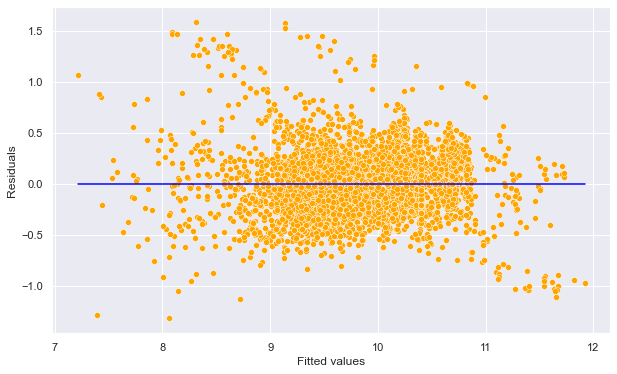

In [145]:
#Plotting residuals vs fitted values
sns.scatterplot(x = (model_log.fittedvalues), y=(model_log.resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Now we observe that the constant variance assumption is satisfied. Let us see the RMSE of this model on test data.

In [146]:
#Computing RMSE on test data
pred_price_log = model_log.predict(testf)
np.sqrt(((testp.price - np.exp(pred_price_log))**2).mean())

9094.209503063496

Note that the RMSE of the log-transformed model has increased as compared to the model without transformation. Does it mean the log-transformed model is less accurate?

0.5572604790419161

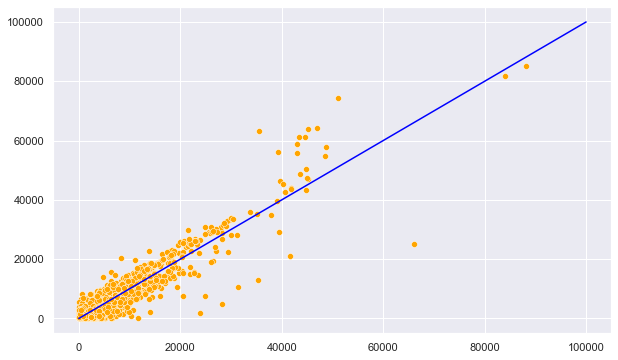

In [147]:
#Comparing errors of the log-transformed model with the previous model
err = np.abs(testp.price - pred_price)
err_log = np.abs(testp.price - np.exp(pred_price_log))
sns.scatterplot(x = err,y = err_log, color = 'orange')
sns.lineplot(x = [0,100000], y = [0,100000], color = 'blue')
np.sum(err_log<err)/len(err)

For 56% of the cars, the log transformed makes a more accurate prediction than the previous model, which seems to indicate that the log-transformed model may be slightly more accurate. However, the conclusion based on RMSE is different. This is because RMSE is an overall measure of prediction accuracy, which can be influenced by a few values since it is based on mean (a non-robust statistic). Thus, RMSE should not be used as the sole measure to compare the accuracy of models.

[Text(0.5, 0, 'log price'), Text(0, 0.5, 'Count')]

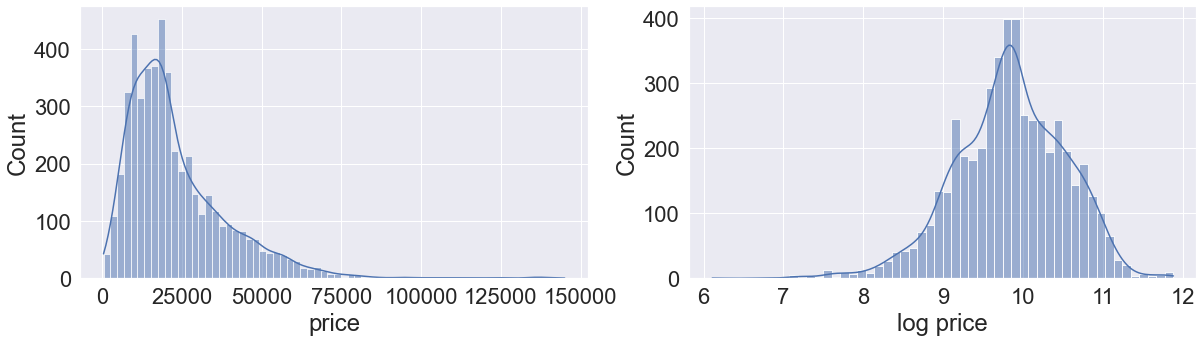

In [149]:
#Visualizing the distribution of price and log(price)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.2)
sns.set(rc = {'figure.figsize':(20,12)})
sns.set(font_scale = 2)
ax = fig.add_subplot(2, 2, 1)
sns.histplot(train.price,kde=True)
ax.set(xlabel='price', ylabel='Count')
ax = fig.add_subplot(2, 2, 2)
sns.histplot(np.log(train.price),kde=True)
ax.set(xlabel='log price', ylabel='Count')

We can see that the log transformation shrinked the higher values of price, making its distribution closer to normal.

Note that heterscedasticity can also occur due to model misspecification, i.e., in case of missing predictor(s). Some of the cars are too expensive, which makes the *price* distribution skewed. Perhaps, the price of expensive cars be better explained by the car *model*, a prdeictor that is missing in the current model.

# Potential issues in linear regression

## Outliers
An outlier is a point for which the true response ($y_i$) is far from the value predicted by the model. Residual plots can be used to identify outliers.

Text(0, 0.5, 'Residuals')

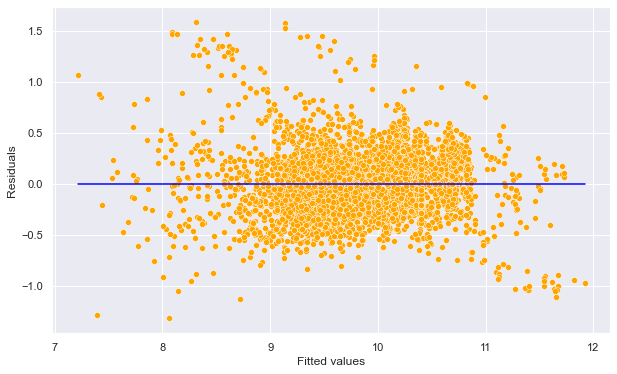

In [151]:
#Plotting residuals vs fitted values
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(x = (model_log.fittedvalues), y=(model_log.resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

Some of the errors may be high. However, it is difficult to decide how large a residual needs to be before we can consider a point to be an outlier. To address this problem, instead of plotting the residuals, we plot the studentized residuals, computed by dividing each residual $e_i$ by the estimated residual standard error (RSE). 

In [4]:
#Studentized residuals
out = model_log.outlier_test()
out

,student_resid,unadj_p,bonf(p)
0,-1.164204,0.244398,1.0
1,-0.801879,0.422661,1.0
2,-1.263820,0.206354,1.0
3,-0.614171,0.539130,1.0
4,0.027930,0.977719,1.0
...,...,...,...
4955,-0.523361,0.600747,1.0
4956,-0.509539,0.610397,1.0
4957,-1.718802,0.085713,1.0
4958,-0.077595,0.938153,1.0


Studentized residuals are in the first column of the above table.

Text(0, 0.5, 'Studentized Residuals')

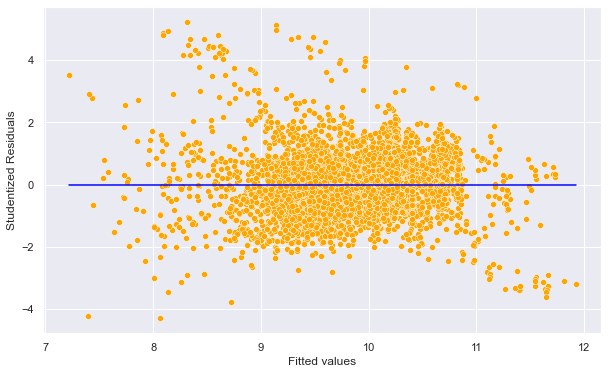

In [155]:
#Plotting residuals vs fitted values
sns.scatterplot(x = (model_log.fittedvalues), y=(out.student_resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')

**Potential outliers:** Observations whose studentized residuals are greater than 3 in absolute value may be outliers.

**Impact of outliers:** Outliers do not have a large impact on the OLS line. However, outliers do inflate the residual standard error (RSE). RSE in turn is used to compute the standard errors of beta coefficients. So, due to outliers, statistically significant variables may appear to be insignificant, and R-squared may appear to be lower.

In [156]:
#Number of points with absolute studentized residuals greater than 3
np.sum((np.abs(out.student_resid)>3))

86

**Are there outliers in our example?**: In the above plot, there are 86 points with absolute studentized residuals larger than 3. However, most of the predictors are significant and R-squared has a relatively high value of 80%. Thus, even if there are outliers, there is no need to remove them as it is unlikely to change the significance of individual variables. Furthermore, looking into the data, we find that the price of some of the luxury cars such as Mercedez G-class is actually much higher than average. So, the potential outliers in the data do not seem to be due to incorrect data. The high studentized residuals may be due to some deficiency in the model, such as missing predictor(s) (like car model), rather than incorrect data. Thus, we should not remove any data that has an outlying value of *log(price)*.

Since *model* seems to be a variable that can explain the price of overly expensive cars, let us include it in the regression model.

In [157]:
#Model with an interaction term and a variable transformation term
ols_object = smf.ols(formula = 'np.log(price)~(year+engineSize+mileage+mpg)**2+I(mileage**2)+model', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1122.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:28:17   Log-Likelihood:                 2687.6
No. Observations:                4960   AIC:                            -5173.
Df Residuals:                    4859   BIC:                            -4516.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -148.2934     13.310    -11.142      0.000    -174.386    -122.201
model[T. 7 Series]                  0.1876      0.024      7.811      0.000       0.141       0.235
model[T. 8 Series]                  0.4382      0.033     13.150      0.000       0.373       0.504
model[T. A7]                        0.0791      0.023      3.373      0.001       0.033       0.125
model[T. A8]                        0.1393      0.023      6.014      0.000       0.094       0.185
model[T. Agila]                    -1.0863      0.043    -24.993      0.000      -1.172      -1.001
model[T. Amarok]                   -0.0881      0.025     -3.578      0.000      -0.136      -0.040
model[T. Antara]                   -0.7253      0.039    -18.409      0.000      -0.803      -0.648
model[T. Arteon]                   -0.1461      0.022     -6.656      0.000      -0.189      -0.103
model[T. Avensis]                  -0.5870      0.026    -22.359      0.000      -0.639      -0.536
model[T. Beetle]                   -0.5124      0.028    -18.159      0.000      -0.568      -0.457
model[T. CC]                       -0.4038      0.027    -15.093      0.000      -0.456      -0.351
model[T. CLA Class]                -0.0977      0.026     -3.731      0.000      -0.149      -0.046
model[T. CLK]                      -0.3421      0.077     -4.464      0.000      -0.492      -0.192
model[T. CLS Class]                 0.0589      0.021      2.829      0.005       0.018       0.100
model[T. Caddy]                    -0.2763      0.066     -4.156      0.000      -0.407      -0.146
model[T. Caddy Life]               -0.4621      0.057     -8.116      0.000      -0.574      -0.350
model[T. Caddy Maxi Life]          -0.4247      0.030    -14.008      0.000      -0.484      -0.365
model[T. California]                0.6004      0.051     11.736      0.000       0.500       0.701
model[T. Camry]                    -0.2137      0.053     -4.006      0.000      -0.318      -0.109
model[T. Caravelle]                 0.3928      0.026     15.086      0.000       0.342       0.444
model[T. Combo Life]               -0.6212      0.025    -24.673      0.000      -0.671      -0.572
model[T. Edge]                     -0.0858      0.023     -3.797      0.000      -0.130      -0.042
model[T. Eos]                      -0.4208      0.067     -6.287      0.000      -0.552      -0.290
model[T. Fusion]                   -1.0541      0.056    -18.745      0.000      -1.164      -0.944
model[T. G Class]                   0.9873      0.050     19.705      0.000       0.889       1.085
model[T. GL Class]                  0.0374      0.024      1.548      0.122      -0.010       0.085
model[T. GLB Class]                 0.0548      0.051      1.071      0.284      -0

In [158]:
#Computing RMSE on test data
pred_price_log2 = model_log.predict(testf)
np.sqrt(((testp.price - np.exp(pred_price_log2))**2).mean())

4252.20045604376

Text(0, 0.5, 'Residuals')

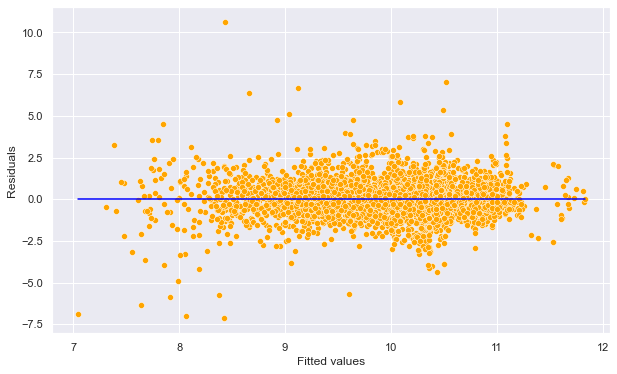

In [159]:
#Plotting residuals vs fitted values
#Studentized residuals
out = model_log.outlier_test()
sns.scatterplot(x = (model_log.fittedvalues), y=(out.student_resid),color = 'orange')
sns.lineplot(x = [model_log.fittedvalues.min(),model_log.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [330]:
#Number of points with absolute studentized residuals greater than 3
np.sum((np.abs(out.student_resid)>3))

69

Note the RMSE has reduced to almost half of its value corresponding to the regression model without the predictor - *model*.  Car model does help better explain the variation in price of cars! The number of points with absolute studentized residuals greater than 3 has also reduced to 69 from 86.

## High leverage points

High leverage points are those with an unsual value of the predictor(s). They have a relatively higher impact on the OLS line, as compared to the outliers. 

**Leverage statistic** (page 99 of the book): In order to quantify an observation’s leverage, we compute the leverage statistic. A large value of this statistic indicates an observation with high leverage. For simple linear regression,
\begin{equation}
h_i = \frac{1}{n} + \frac{(x_i - \bar x)^2}{\sum_{i'=1}^{n}(x_{i'} - \bar x)^2}.
\end{equation}

It is clear from this equation that $h_i$ increases with the distance of $x_i$ from $\bar x$.The leverage statistic $h_i$ is always between $1/n$ and $1$, and the average leverage for all the observations is always equal to $(p+1)/n$. So if a given observation has a leverage statistic that greatly exceeds $(p+1)/n$, then we may suspect that the corresponding point has high leverage.

**Influential points:** Note that if a high leverage point falls in line with the regression line, then it will not effect the regression line. However, it may inflate R-squared and increase the significance of predictors. If a high leverage point falls away from the regression line, then it is also an outlier, and will effect the regression line. The points whose presence significantly effects the regression line are called influential points. A point that is both a high leverage point and an outlier is likely to be an influential point. However, a high leverage point is not necessarily an influential point.

*Source for influential points: https://online.stat.psu.edu/stat501/book/export/html/973*

Let us see if there are any high leverage points in our regression model without the *model* predictor.

In [104]:
#Model with an interaction term and a variable transformation term
ols_object = smf.ols(formula = 'np.log(price)~(year+engineSize+mileage+mpg)**2+I(mileage**2)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1834.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:00:59   Log-Likelihood:                -1173.8
No. Observations:                4960   AIC:                             2372.
Df Residuals:                    4948   BIC:                             2450.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -238.2125     25.790     -9.237      0.000    -288.773    -187.652
year                   0.1227      0.013      9.608      0.000       0.098       0.148
engineSize            13.8349      5.795      2.387      0.017       2.475      25.195
mileage                0.0005      0.000      3.837      0.000       0.000       0.001
mpg                   -1.2446      0.345     -3.610      0.000      -1.921      -0.569
year:engineSize       -0.0067      0.003     -2.324      0.020      -0.012      -0.001
year:mileage        -2.67e-07    6.8e-08     -3.923      0.000      -4e-07   -1.34e-07
year:mpg               0.0006      0.000      3.591      0.000       0.000       0.001
engineSize:mileage -2.668e-07   4.08e-07     -0.654      0.513   -1.07e-06    5.33e-07
engineSize:mpg         0.0028      0.000      6.842      0.000       0.002       0.004
mileage:mpg         7.235e-08   1.79e-08      4.036      0.000    3.72e-08    1.08e-07
I(mileage ** 2)     1.828e-11   5.64e-12      3.240      0.001    7.22e-12    2.93e-11
==============================================================================
Omnibus:                      711.515   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2545.807
Skew:                           0.699   Prob(JB):                         0.00
Kurtosis:                       6.220   Cond. No.                     1.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
#Computing the leverage statistic for each observation
influence = model_log.get_influence()
leverage = influence.hat_matrix_diag

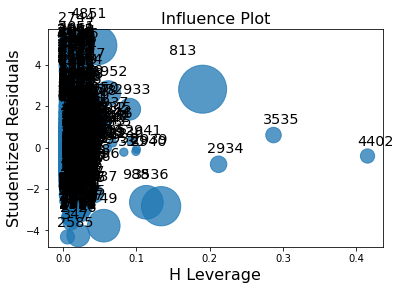

In [6]:
#Visualizng leverage against studentized residuals
import statsmodels.api as sm
sm.graphics.influence_plot(model_log);

Let us identify the high leverage points in the data, as they may be effecting the regression line if they are outliers as well.

In [106]:
out = model_log.outlier_test()

In [113]:
#Average leverage of points
(model_log.df_model+1)/model_log.nobs

0.002438528754318228

In [134]:
#Let us consider the cut-off value of leverage to be 4 times the average leverage for all the observations. 
#We will remove all observations that have leverage higher than the cut-off value.
cutoff = 4*(model_log.df_model+1)/model_log.nobs

In [136]:
#Number of high leverage points in the dataset
np.sum(leverage>cutoff)

193

Observations that are both high leverage points and outliers are influential points that may effect the regression line. Let's remove these influential points from the data and see if it improves the model prediction accuracy on test data.

In [137]:
#Dropping influential points from data
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],(np.where(leverage>cutoff)[0])))

In [138]:
train_filtered.shape

(4921, 11)

In [139]:
#Number of points removed as they were influential
train.shape[0]-train_filtered.shape[0]

39

We removed 39 influential data points from the training data.

In [126]:
#Model the model after removing the high leverage observations
ols_object = smf.ols(formula = 'np.log(price)~(year+engineSize+mileage+mpg)**2+I(mileage**2)', data = train_filtered)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     2173.
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:06:58   Log-Likelihood:                -775.51
No. Observations:                4921   AIC:                             1575.
Df Residuals:                    4909   BIC:                             1653.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -262.7743     24.455    -10.745      0.000    -310.717    -214.832
year                   0.1350      0.012     11.148      0.000       0.111       0.159
engineSize            16.6645      5.482      3.040      0.002       5.917      27.412
mileage                0.0008      0.000      5.945      0.000       0.001       0.001
mpg                   -1.1217      0.324     -3.458      0.001      -1.758      -0.486
year:engineSize       -0.0081      0.003     -2.997      0.003      -0.013      -0.003
year:mileage       -3.927e-07    6.5e-08     -6.037      0.000    -5.2e-07   -2.65e-07
year:mpg               0.0005      0.000      3.411      0.001       0.000       0.001
engineSize:mileage -4.566e-07   3.86e-07     -1.183      0.237   -1.21e-06       3e-07
engineSize:mpg         0.0071      0.000     16.202      0.000       0.006       0.008
mileage:mpg          7.29e-08   1.68e-08      4.349      0.000       4e-08    1.06e-07
I(mileage ** 2)     1.418e-11   5.29e-12      2.683      0.007    3.82e-12    2.46e-11
==============================================================================
Omnibus:                      631.414   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1851.015
Skew:                           0.682   Prob(JB):                         0.00
Kurtosis:                       5.677   Cond. No.                     1.73e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that we obtain a higher R-sqauared value of 83% as compared to 80% with the complete data. Removing the influential points helped obtain a better model fit. However, that may also happen just by reducing observations.

In [127]:
#Computing RMSE on test data
pred_price_log = model_log.predict(testf)
np.sqrt(((testp.price - np.exp(pred_price_log))**2).mean())

8820.685844070766

The RMSE on test data has also reduced. This shows that some of the influential points were impacting the regression line. With those points removed, the model better captures the general trend in the data.

## Collinearity

Collinearity refers to the situation when two or more predictor variables have a high linear association. Linear association between a pair of variables can be measured by the correlation coefficient. Thus the correlation matrix can indicate some potential collinearity problems. 

**Why and how is collinearity a problem** (page 100-101 of book): The presence of collinearity can pose problems in the regression context, since it can be difficult to separate out the individual effects of collinear variables on the response. 

Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for $\hat \beta_j$ to grow. Recall that the t-statistic for each predictor is calculated by dividing $\hat \beta_j$ by its standard error. Consequently, collinearity results in a decline in the t-statistic. As a result, in the presence of collinearity, we may fail to reject $H_0: \beta_j = 0$. This means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity.

**How to measure collinearity/multicollinearity** (page 102 of book): Unfortunately, not all collinearity problems can be detected by inspection of the correlation matrix: it is possible for collinearity to exist between three or more variables even if no pair of variables has a particularly high correlation. We call this situation multicollinearity. Instead of inspecting the correlation matrix, a better way to assess multi- collinearity is to compute the variance inflation factor (VIF). The VIF is variance inflation factor the ratio of the variance of $\hat \beta_j$ when fitting the full model divided by the variance of $\hat \beta_j$ if fit on its own. The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. The VIF for each variable can be computed using the formula:

\begin{equation}
VIF(\hat \beta_j) = \frac{1}{1-R^2_{X_j|X_{-j}}}
\end{equation}

In [219]:
#Correlation matrix
train.corr()

,carID,year,mileage,tax,mpg,engineSize,price
carID,1.000000,0.006251,-0.001320,0.023806,-0.010774,0.011365,0.012129
year,0.006251,1.000000,-0.768058,-0.205902,-0.057093,0.014623,0.501296
mileage,-0.001320,-0.768058,1.000000,0.133744,0.125376,-0.006459,-0.478705
tax,0.023806,-0.205902,0.133744,1.000000,-0.488002,0.465282,0.144652
mpg,-0.010774,-0.057093,0.125376,-0.488002,1.000000,-0.419417,-0.369919
engineSize,0.011365,0.014623,-0.006459,0.465282,-0.419417,1.000000,0.624899
price,0.012129,0.501296,-0.478705,0.144652,-0.369919,0.624899,1.000000


Let us compute the Variance Inflation Factor (VIF) for the four predictors.

In [140]:
X = train[['mpg','year','mileage','engineSize']]

In [148]:
X.columns[1:]

Index(['mpg', 'year', 'mileage', 'engineSize'], dtype='object')

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
      
# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                          for i in range(len(X.columns))]

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

      feature           VIF
0       const  1.201579e+06
1         mpg  1.243040e+00
2        year  2.452891e+00
3     mileage  2.490210e+00
4  engineSize  1.219170e+00


As all the values of VIF are close to one, we do not have the problem of multicollinearity in the model. Note that the VIF of *year* and *mileage* is relatively high as they are the most correlated.

In [12]:
#Manually computing the VIF for year
ols_object = smf.ols(formula = 'year~(mpg+engineSize+mileage)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2400.
Date:                Tue, 01 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:24:20   Log-Likelihood:                -10066.
No. Observations:                4960   AIC:                         2.014e+04
Df Residuals:                    4956   BIC:                         2.017e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2018.3135      0.140   1.44e+04      0.000    2018.039    2018.588
mpg            0.0095      0.002      5.301      0.000       0.006       0.013
engineSize     0.1171      0.037      3.203      0.001       0.045       0.189
mileage    -9.139e-05   1.08e-06    -84.615      0.000   -9.35e-05   -8.93e-05
==============================================================================
Omnibus:                     2949.664   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63773.271
Skew:                          -2.426   Prob(JB):                         0.00
Kurtosis:                      19.883   Cond. No.                     1.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [470]:
#VIF for year
1/(1-0.592)

2.4509803921568625

Note that year and mileage have a high linear correlation. Removing one of them should decrease the standard error of the coefficient of the other, without significanty decrease R-squared.

In [440]:
ols_object = smf.ols(formula = '(price)~(mpg+engineSize+mileage+year)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2410.
Date:                Sun, 23 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:45:55   Log-Likelihood:                -52497.
No. Observations:                4960   AIC:                         1.050e+05
Df Residuals:                    4955   BIC:                         1.050e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.661e+06   1.49e+05    -24.593      0.000   -3.95e+06   -3.37e+06
mpg          -79.3126      9.338     -8.493      0.000     -97.620     -61.006
engineSize  1.218e+04    189.969     64.107      0.000    1.18e+04    1.26e+04
mileage       -0.1474      0.009    -16.817      0.000      -0.165      -0.130
year        1817.7366     73.751     24.647      0.000    1673.151    1962.322
==============================================================================
Omnibus:                     2450.973   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31060.548
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                      14.557   Cond. No.                     3.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing mileage from the above regression.

In [223]:
ols_object = smf.ols(formula = '(price)~(mpg+engineSize+year)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2951.
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:04:28   Log-Likelihood:                -52635.
No. Observations:                4960   AIC:                         1.053e+05
Df Residuals:                    4956   BIC:                         1.053e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.586e+06   9.78e+04    -57.098      0.000   -5.78e+06   -5.39e+06
mpg         -101.9120      9.500    -10.727      0.000    -120.536     -83.288
engineSize  1.196e+04    194.848     61.392      0.000    1.16e+04    1.23e+04
year        2771.1844     48.492     57.147      0.000    2676.118    2866.251
==============================================================================
Omnibus:                     2389.075   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26920.051
Skew:                           2.018   Prob(JB):                         0.00
Kurtosis:                      13.675   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
ols_object = smf.ols(formula = '(price)~(mpg+engineSize+year+mileage)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2410.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:10:59   Log-Likelihood:                -52497.
No. Observations:                4960   AIC:                         1.050e+05
Df Residuals:                    4955   BIC:                         1.050e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.661e+06   1.49e+05    -24.593      0.000   -3.95e+06   -3.37e+06
mpg          -79.3126      9.338     -8.493      0.000     -97.620     -61.006
engineSize  1.218e+04    189.969     64.107      0.000    1.18e+04    1.26e+04
year        1817.7366     73.751     24.647      0.000    1673.151    1962.322
mileage       -0.1474      0.009    -16.817      0.000      -0.165      -0.130
==============================================================================
Omnibus:                     2450.973   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31060.548
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                      14.557   Cond. No.                     3.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
ols_object = smf.ols(formula = '(price)~(year)', data = train)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     1664.
Date:                Mon, 31 Jan 2022   Prob (F-statistic):          5.84e-314
Time:                        12:11:12   Log-Likelihood:                -54459.
No. Observations:                4960   AIC:                         1.089e+05
Df Residuals:                    4958   BIC:                         1.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.728e+06   1.41e+05    -40.627      0.000      -6e+06   -5.45e+06
year        2851.7747     69.907     40.794      0.000    2714.725    2988.824
==============================================================================
Omnibus:                     2541.815   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23237.973
Skew:                           2.270   Prob(JB):                         0.00
Kurtosis:                      12.583   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
73.751/69.907

1.0549873403235728

In [7]:
1.05**2

1.1025

Note that the standard error of the coefficient of *year* has reduced from 73 to 48, without any large reduction in R-squared.